# ASSIGNMENT 1 - 100 MARKS

1. Mention the version of packages (like networkx) you are using.
2. This notebook will be converted to a python script for plagiarism check. So the name of the notebook should only be your rollnumber followed by assignment number. Ex <M21AI004_Ass1.ipynb>. Any other naming convention will carry penalty.
4. In case there is plagiarism all the students whose code is same will be awarded 0.
5. You are adviced to not copy your code from ChatGPT. If found you will be awarded 0.
5. You are adviced to read BOOK 3: Networks, Crowds, and Markets, Chapter 5 for this assignment.

# Q1 [40 marks]

Load the email_eu.txt edge list and convert this to a Networkx Graph [5 marks]

In [ ]:
import networkx as nx #version 3.3
import gdown #package used for downloading public file from Google Drive
import matplotlib.pyplot as plt

In [ ]:
nx.__version__

'3.3'

In [ ]:
file_id = '1Q7k7nhRKvs5y-imHNZ_Dyr1p72GCOn2B'
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id)
G = nx.read_edgelist('email_eu.txt',create_using=nx.Graph(), nodetype=int)

Downloading...
From: https://drive.google.com/uc?/export=download&id=1Q7k7nhRKvs5y-imHNZ_Dyr1p72GCOn2B
To: /content/email_eu.txt
100%|██████████| 193k/193k [00:00<00:00, 34.6MB/s]


In [ ]:
G

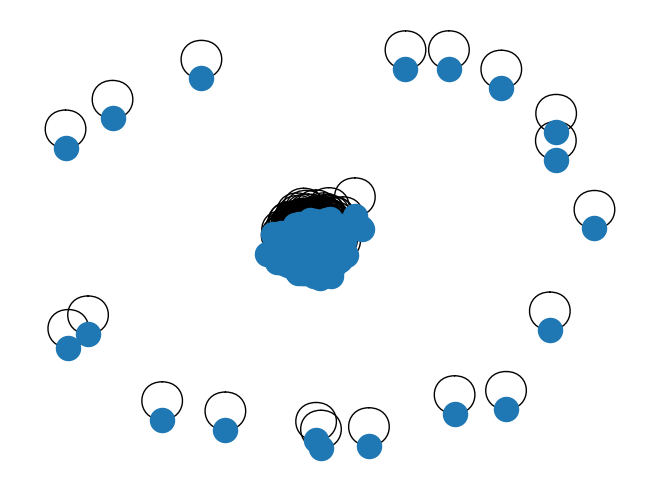

In [ ]:
nx.draw(G)

Plot the degree distribution of the Graph [10 marks]

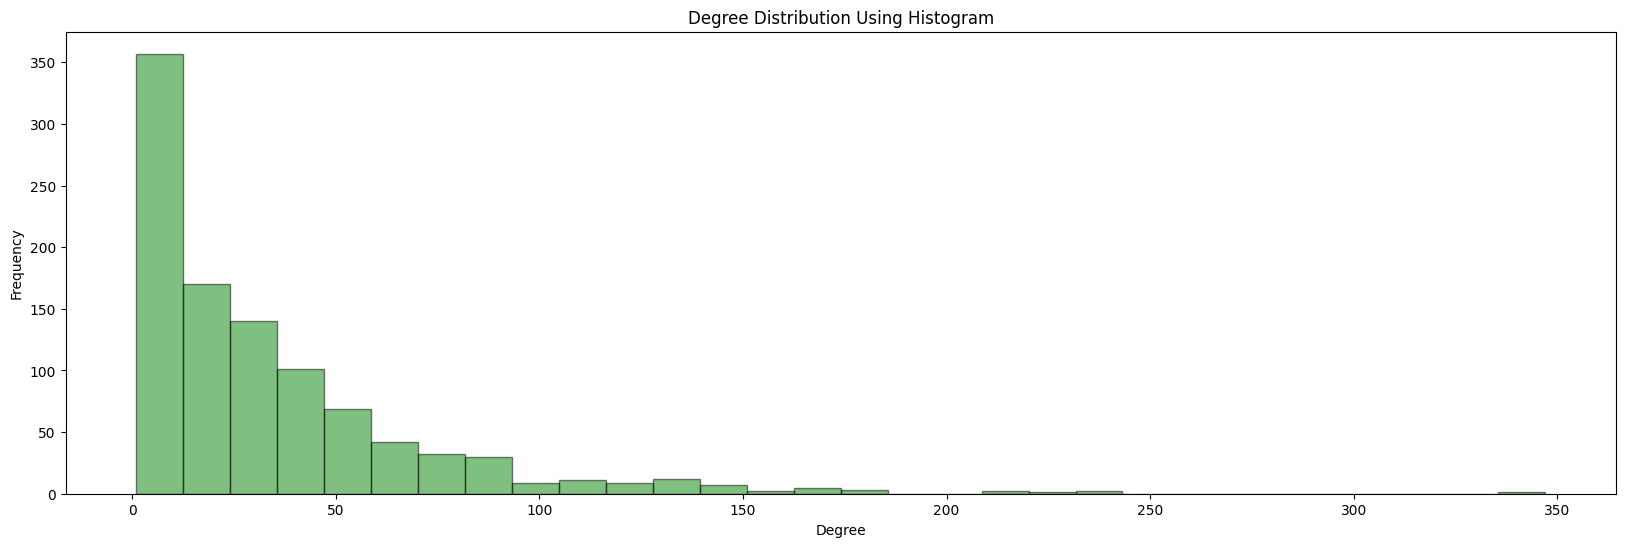

In [ ]:
degree_distribution = [d for n, d in G.degree()]
plt.figure(figsize=(20,6))
plt.hist(degree_distribution,bins=30,edgecolor='black',color='green',alpha=0.5)
plt.title('Degree Distribution Using Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

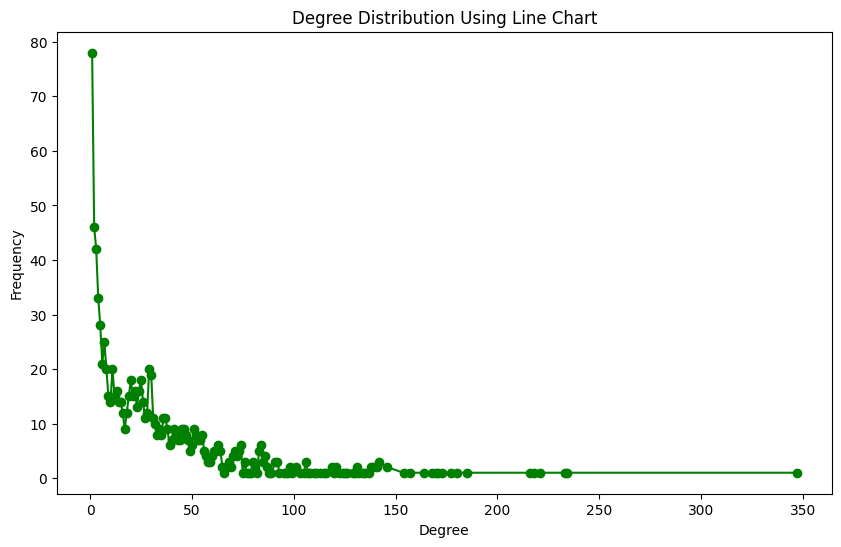

In [ ]:
from collections import Counter
degree_distribution = [d for n, d in G.degree()]
plt.figure(figsize=(10,6))
degree_count = Counter(degree_distribution)
degrees, counts = zip(*sorted(degree_count.items()))
plt.plot(degrees, counts, marker='o', linestyle='-', color='Green')
plt.title('Degree Distribution Using Line Chart')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

For a random k between 0-20 find all the k-cores in the network [25 marks]

In [ ]:
def kcore(graph, k):
  # print(f"No of nodes in graph :{graph.number_of_nodes()}")
  # print(f"No of edges in graph :{graph.number_of_edges()}")
  for (u,v) in graph.edges():   #removing self loops
    if u==v:
      graph.remove_edge(u,u)
  # print(f"No of nodes in graph after removing selfloop :{graph.number_of_nodes()}")
  # print(f"No of edges in graph after removing selfloop :{graph.number_of_edges()}")
  list_to_remove = []    #empty list to append the nodes to be removed
  for n in graph.nodes:
    if graph.degree(n) < k:    #checking if degree of node is less than k
      list_to_remove.append(n)  #true then append to list
  # print(f"No of nodes to be removed :{len(list_to_remove)}")
  graph.remove_nodes_from(list_to_remove) #deleting nodes with degree less than k
  print(f"No of nodes in k-core :{graph.number_of_nodes()}")
  print(f"No of edges in k-core :{graph.number_of_edges()}")
  kcores = graph;
  return kcores
kcore(G,7)


No of nodes in k-core :735
No of edges in k-core :15390


In [ ]:
graph =G.copy()
graph.remove_edges_from(nx.selfloop_edges(graph))
print(nx.k_core(graph,k=7))

Graph with 735 nodes and 15390 edges


# Q2 [60 marks]

***Positive Edge Component (Supernode)***:  A supernode is connected internally via positive edges, and the only edges going between two different supernodes are negative. If there were a positive edge linking two different supernodes, we should have combined them together into a single
supernode.
For example in Figure 2 we can see that [9, 7, 12, 10, 13] can be considered to be a supernode with positive edges.

Cosider a networkx signed *graph* in ***Figure 1***


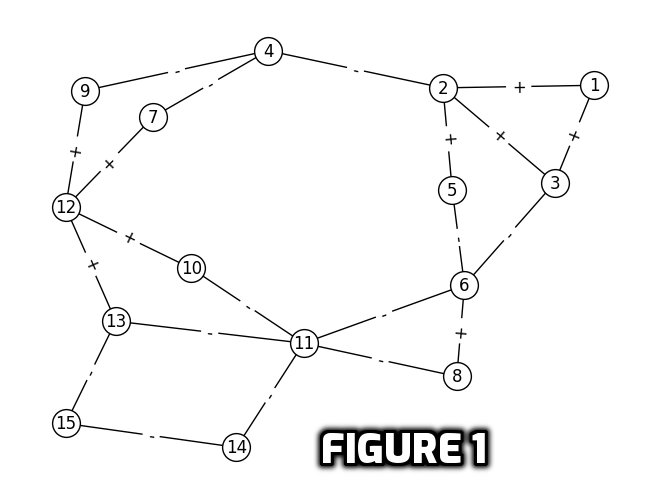

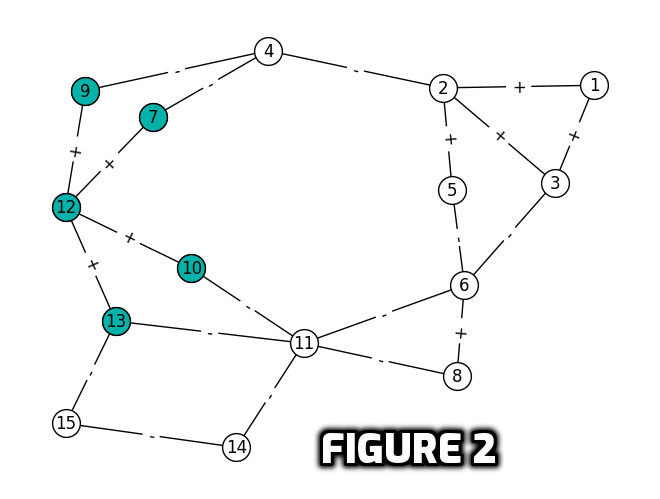

1. Write a code which takes a Networkx graph as input and outputs all the positive edge components or supernodes (The definition of supernodes is mentioned above). For more details you can refer to the network book - **Book 3 (Networks, Crowds, and Markets:), Chapter 5, Page 153 (138 in book)**.

NOTE: The supernodes should be in a list format example if there are three supernodes then we should return [[a, b, c], [d, e, f], [g]] where [a,b,c] is a supernode, [d,e,f] is a supernode and [g] is a supernode. [20 marks]

In [ ]:
import networkx as nx

In [ ]:
def create_graph():
  graph1 = nx.Graph()
  edge_list = [(1,2,'+'),(1,3,'+'),(2,3,'+'),(2,5,'+'),(2,4,'-'),(3,6,'-'),(5,6,'-'),(6,11,'-'),(6,8,'+'),
             (8,11,'-'),(11,10,'-'),(11,13,'-'),(11,14,'-'),(14,15,'-'),(15,13,'-'),(13,12,'+'),(10,12,'+'),
             (12,9,'+'),(12,7,'+'),(7,4,'-'),(9,4,'-')]
  for x,y,s in edge_list:
    graph1.add_edge(x,y,sign=s)
  return graph1


In [ ]:
create_graph()

In [ ]:
def positive_components(G):
  positive_edges=[]
  graph1=create_graph()
  for x,y,s in graph1.edges(data=True):
    if s["sign"] == "+":
      positive_edges.append((x,y))
  subgraph = graph1.edge_subgraph(positive_edges)
#nx.draw(subgraph,with_labels=True)
  components=list(nx.connected_components(subgraph))
  return components

In [ ]:
positive_components(G)

[{1, 2, 3, 5}, {6, 8}, {7, 9, 10, 12, 13}]

2. Now that you have found out the components (supernodes), write code that highlights the components as shown in Figure 2. Nodes in the same component must have the same color. [10 marks]

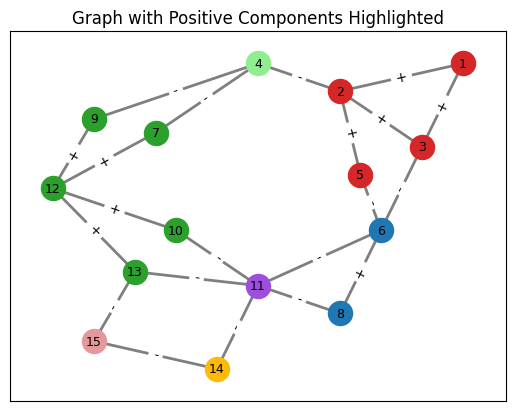

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
H = create_graph()
pos={1:(10,12),2:(7,11),3:(9,9),4:(5,12),5:(7.5,8),6:(8,6),7:(2.5,9.5),8:(7,3),9:(1,10),10:(3,6),
  11:(5,4),12:(0,7.5),13:(2,4.5),14:(4,1),15:(1,2)}
edge_label = {(x,y):s["sign"]for x,y,s in H.edges(data=True)}
comp = positive_components(G)
Hcopy = create_graph()
for i in comp:
  Hcopy.remove_nodes_from(i)
nodes = list(Hcopy.nodes())
nx.draw_networkx_nodes(H, pos=pos, nodelist=comp[0], node_color="tab:red")
nx.draw_networkx_nodes(H, pos=pos, nodelist=comp[1], node_color="tab:blue")
nx.draw_networkx_nodes(H, pos=pos, nodelist=comp[2], node_color="tab:green")
nx.draw_networkx_nodes(H, pos=pos, nodelist=[nodes[0]], node_color="lightgreen")
nx.draw_networkx_nodes(H, pos=pos, nodelist=[nodes[1]], node_color="#9d4edd")
nx.draw_networkx_nodes(H, pos=pos, nodelist=[nodes[2]], node_color="#ffba08")
nx.draw_networkx_nodes(H, pos=pos, nodelist=[nodes[3]], node_color="#e5989b")
nx.draw_networkx_edges(H, pos=pos, alpha=0.5, width=2)
#nx.draw(H,pos,with_labels = True,font_size=10, font_color='black',edge_color ="#606c38")
nx.draw_networkx_edge_labels(H,pos = pos, edge_labels = edge_label,label_pos=0.5)
nx.draw_networkx_labels(H, pos=pos, font_color='black',font_size=9)
#print(G.edges(data = True))
plt.title("Graph with Positive Components Highlighted")
plt.show()

3. Take each supernode and create a networkx graph using these supernodes. Each supernode will be connected to other supernodes by a negative edge. You can refer to Figure 5.12 in Chapter 5, Page 153 (139 in book) of Book 3. Plot this graph using networkx. [10 marks]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import groups

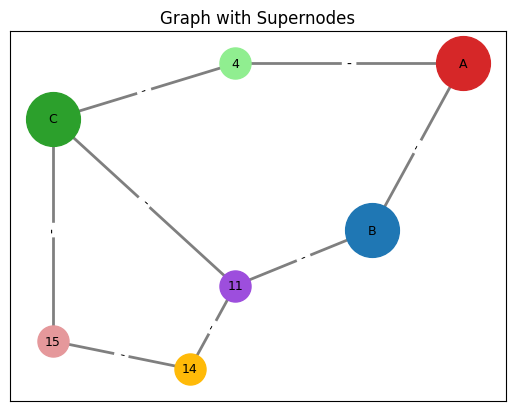

In [ ]:
I = create_graph()
comp = positive_components(I)
for i in comp:
  I.remove_nodes_from(i)
new_edges = [('A','B','-'),("B",11,"-"),(11,"C","-"),("C",4,"-"),(15,"C","-"),(4,"A","-")]
for x,y,s in new_edges:
    I.add_edge(x,y,sign=s)
edge_label2 = {(x,y):s["sign"]for x,y,s in I.edges(data=True)}
pos1={"A":(10,12),4:(5,12),"B":(8,6),7:(2.5,9.5),"C":(1,10),
  11:(5,4),14:(4,1),15:(1,2)}
nx.draw_networkx_nodes(I, pos=pos1,nodelist=["A"], node_color="tab:red",node_size=1500)
nx.draw_networkx_nodes(I, pos=pos1, nodelist=["B"], node_color="tab:blue",node_size=1500)
nx.draw_networkx_nodes(I, pos=pos1, nodelist=["C"], node_color="tab:green",node_size=1500)
nx.draw_networkx_nodes(I, pos=pos1, nodelist=[4], node_color="lightgreen",node_size=500)
nx.draw_networkx_nodes(I, pos=pos1, nodelist=[11], node_color="#9d4edd",node_size=500)
nx.draw_networkx_nodes(I, pos=pos1, nodelist=[14], node_color="#ffba08",node_size=500)
nx.draw_networkx_nodes(I, pos=pos1, nodelist=[15], node_color="#e5989b",node_size=500)
nx.draw_networkx_edges(I, pos=pos1, alpha=0.5, width=2)
nx.draw_networkx_edge_labels(I,pos = pos1, edge_labels = edge_label2,label_pos=0.5)
nx.draw_networkx_labels(I, pos=pos1, font_color='black',font_size=9)
plt.title("Graph with Supernodes")
plt.show()
#nx.draw(I)

4. Identify if there are any cycles containing odd number of negative edges (in the supernode graph created in the previous step). Color the nodes participating in this cycle. You may use networkx function for finding cycles.[10 marks]

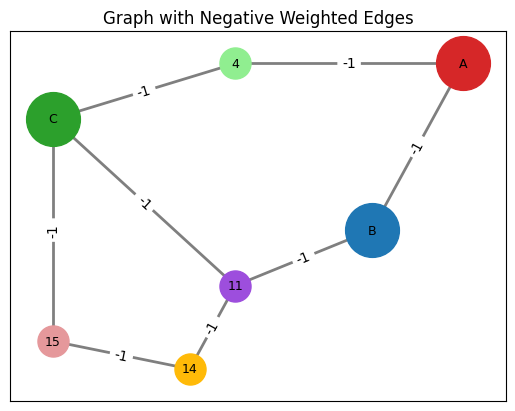

In [ ]:
J = create_graph()
comp = positive_components(I)
for i in comp:
  J.remove_nodes_from(i)
J.remove_edges_from([(11, 14), (14, 15)])
J.add_weighted_edges_from([('A','B',-1),("B",11,-1),(11,"C",-1),("C",4,-1),(15,"C",-1),(4,"A",-1),(15,14,-1),(14,11,-1)])
edge_label2 = nx.get_edge_attributes(J, "weight")
pos1={"A":(10,12),4:(5,12),"B":(8,6),7:(2.5,9.5),"C":(1,10),
  11:(5,4),14:(4,1),15:(1,2)}
nx.draw_networkx_nodes(J, pos=pos1,nodelist=["A"], node_color="tab:red",node_size=1500)
nx.draw_networkx_nodes(J, pos=pos1, nodelist=["B"], node_color="tab:blue",node_size=1500)
nx.draw_networkx_nodes(J, pos=pos1, nodelist=["C"], node_color="tab:green",node_size=1500)
nx.draw_networkx_nodes(J, pos=pos1, nodelist=[4], node_color="lightgreen",node_size=500)
nx.draw_networkx_nodes(J, pos=pos1, nodelist=[11], node_color="#9d4edd",node_size=500)
nx.draw_networkx_nodes(J, pos=pos1, nodelist=[14], node_color="#ffba08",node_size=500)
nx.draw_networkx_nodes(J, pos=pos1, nodelist=[15], node_color="#e5989b",node_size=500)
nx.draw_networkx_edges(J, pos=pos1, alpha=0.5, width=2)
nx.draw_networkx_edge_labels(J,pos = pos1,edge_labels = edge_label2,label_pos=0.5)
nx.draw_networkx_labels(J, pos=pos1, font_color='black',font_size=9)
plt.title("Graph with Negative Weighted Edges")
plt.show()


In [ ]:
all_cycles = list(nx.cycle_basis(J))
print(all_cycles)

[[11, 14, 15, 'C'], [11, 'B', 'A', 4, 'C']]


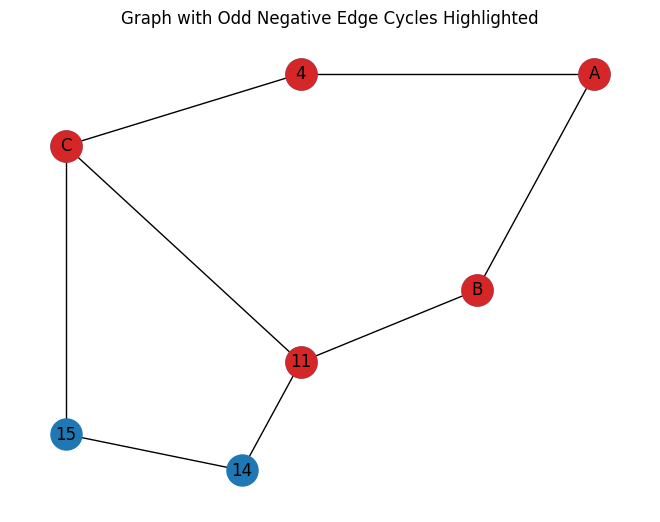

Cycles with odd number of negative edges: [[11, 'B', 'A', 4, 'C']]


In [ ]:
all_cycles = list(nx.cycle_basis(J))
odd_negative_edge_cycles = []
for cycle in all_cycles:
    negative_edge_count = 0
    for i in range(len(cycle)):
        u = cycle[i]
        v = cycle[(i + 1) % len(cycle)]
        if J[x][y]['weight'] < 0:
            negative_edge_count += 1
    if negative_edge_count % 2 == 1:  # Check if the count is odd
        odd_negative_edge_cycles.append(cycle)
nx.draw(J, pos=pos1, with_labels=True, edge_color='black', node_size=500, font_size=12)
nx.draw_networkx_nodes(J, pos=pos1, nodelist=odd_negative_edge_cycles[0], node_color="tab:red",node_size=500)
plt.title("Graph with Odd Negative Edge Cycles Highlighted")
plt.show()

# Print cycles with odd number of negative edges
print("Cycles with odd number of negative edges:", odd_negative_edge_cycles)

5. Plot the BFS tree of this new graph as shown in Figure 5.16 of the book. [10 marks]

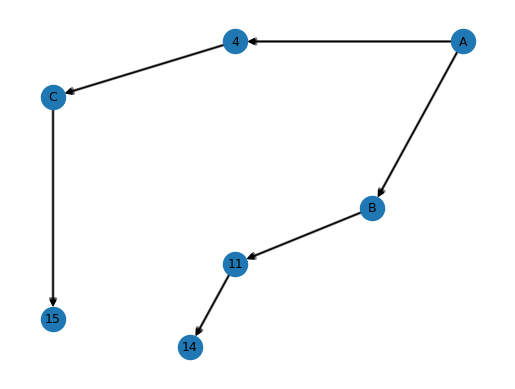

In [ ]:
K=nx.bfs_tree(J, source = 'A', reverse=False, depth_limit=None, sort_neighbors=None)
nx.draw_networkx_edges(K, pos=pos1, alpha=0.5, width=2)
#nx.draw_networkx_edge_labels(J,pos = pos1,edge_labels = edge_label2,label_pos=0.5)
nx.draw_networkx_labels(K, pos=pos1, font_color='black',font_size=9)
nx.draw(K,pos=pos1)

In [ ]:
def hierarchy_pos(H,root=None ,width=1. ,vert_gap=0.2 ,vert_loc=0,xcenter=0.5):
  if not nx.is_tree(H):
    raise TypeError("cannot use this function if the input graph is not a tree")
  if root is None:
    if isinstance(H,nx.DiGraph):
      root=next(iter(nx.topological_sort(H)))
    else:
      root=random.choice(list(H.nodes))
  def _hierarchy_pos(H,root ,width=1.0 ,vert_gap=0.2 ,vert_loc=0,xcenter=0.5,pos=None,parent=None):
    if pos is None:
      pos= {root:(xcenter,vert_loc)}
    else:
      pos[root]=(xcenter,vert_loc)
    children=list(H.neighbors(root))
    if not isinstance(H,nx.DiGraph) and parent is not None:
      children.remove(parent)
    if len(children) !=0:
      dx=width/len(children)
      nextx=xcenter - width/2 - dx/2
      for child in children:
        nextx += dx
        pos = _hierarchy_pos(H,child,width=dx,vert_gap=vert_gap,vert_loc=vert_loc-vert_gap,xcenter=nextx,pos=pos,parent=root)
    return pos
  return _hierarchy_pos(H,root,width,vert_gap,vert_loc,xcenter)


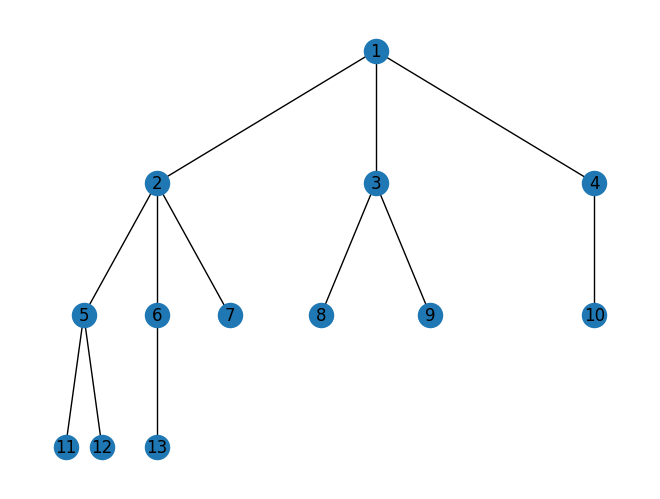

In [ ]:
H = nx.Graph()
H.add_edges_from([(1,2),(1,3),(1,4),(2,5),(2,6),(2,7),
                  (3,8),(3,9),(4,10),(5,11),(5,12),(6,13)])
pos = hierarchy_pos(H,1)
nx.draw(H, pos=pos ,with_labels=True)
